C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


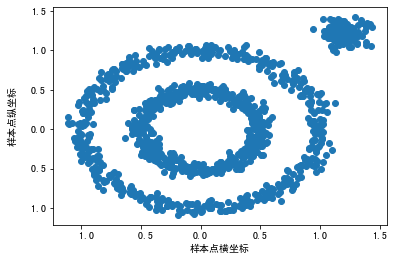

In [31]:
#项目9-项目实训代码
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

#生成数据集
x1,y1=make_circles(n_samples=1000,noise=0.05,factor=0.5,random_state=0)
x2,y2=make_blobs(n_samples=100,n_features=2,centers=[[1.2,1.2]],cluster_std=[[0.1]],random_state=0)
x=np.concatenate((x1,x2))#将x1和x2数据集进行合并
#绘制散点图
plt.scatter(x[:,0],x[:,1])
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('样本点横坐标')
plt.ylabel('样本点纵坐标')
plt.show()

In [32]:
#调节参数
#寻找DBSCAN聚类算法中参数eps与参数min_samples的最优组合
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score #导入calinski_harabasz指数评价模块

eps=np.arange(0.01,1,0.2) #eps参数从0.01开始到1，每隔0.2进行一次
min_samples=np.arange(2,20,1)#min_samples参数取2到20的整数

best_score=0
best_score_eps=0
best_score_min_samples=0

#寻找最优参数组合
for i in eps:  
    for j in min_samples:
        try:#因为不同的参数组合，有可能导致计算得分出错，所以用try语句来捕获异常
            db=DBSCAN(eps=i,min_samples=j).fit(x)
            labels=db.labels_#DBSCAN模型预测的标签
            k=calinski_harabasz_score(x,labels) #calinski_harabasz指数评价聚类的好坏，值越大越好
            
        except:
            db='' #用try遍历i，j， 计算calinski_harabasz指数，出错的跳过
        else:
            if k>best_score:
                best_score=k
                best_score_eps=i
                best_score_min_samples=j
print('calinski_harabasz的最大值为%f，对应的eps值为%.2f，min_samples值为%d'%(best_score,best_score_eps,best_score_min_samples))

calinski_harabasz的最大值为229.975162，对应的eps值为0.21，min_samples值为2


In [33]:
#训练DBSCAN聚类模型
db=DBSCAN(eps=0.21,min_samples=2)
db.fit(x)
labels=db.labels_
print("每类样本对应的类别标签为：")
print(labels)

每类样本对应的类别标签为：
[0 0 1 ... 2 2 2]


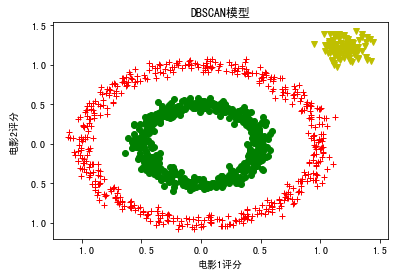

In [35]:
#使用Matplotlib绘制图像，显示DBSCAN聚类模型结果
colors=['g','r','y']
markers=['o','+','v']
for i,l in enumerate(labels):
    plt.plot(x[i][0],x[i][1],color=colors[l],marker=markers[l])
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('电影1评分')
plt.ylabel('电影2评分')
plt.title('DBSCAN模型')
plt.show()